In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
from experiment_mnist import *
from tfshow import *

Using TensorFlow backend.


In [3]:
methods = ['l1', 'l2', 'delta', 'dropout', 'none']
activations = ['sigmoid', 'relu']
layers = [1,2,3,4,5,6]
reg_coeff = np.logspace(-3,3,10)

### Sigmoid, 1 layer, 50 neurons, 0.2 dropout, K = 0.1

In [4]:
N = [50]
P = 0.2
KLips = 0.5
epochs = 200
activation = 'sigmoid'

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:56<00:00,  3.49it/s]


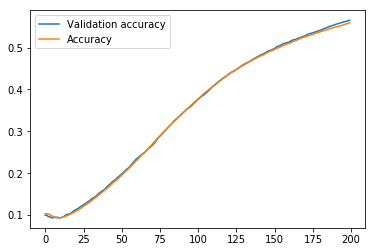

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers


In [5]:
model_no_reg = MNISTExperiment(N, P, KLips, epochs = epochs, activation = activation, reg_type = 0,
                             reg_coeff = 0, do_print = True)

100%|██████████| 20/20 [00:02<00:00,  7.70it/s]


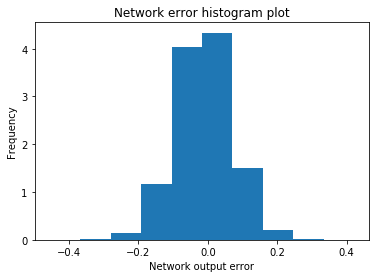

Error; maximal over inputs, average over dropout:
True values array mean: 0.098127 variance 0.063800
Experiment 0.083932 Std 0.067514
Equation   0.490241 Std 0.515433
Tightness  17.1% Std 13.1%


(0.08393155, 0.06751383, 0.4902409076690674, 0.5154325310967263, 0.06379974)

In [6]:
model_no_reg.run(inputs = 20, repetitions = 10000)

In [7]:
acc_no_reg = model_no_reg.get_accuracy(1000, 1000, tqdm_ = tqdm)
print(acc_no_reg)

100%|██████████| 1000/1000 [00:11<00:00, 84.16it/s]

0.308762


In [8]:
acc_no_reg_orig = model_no_reg.get_accuracy(1000, 1000, tqdm_ = tqdm, no_dropout = True)
print(acc_no_reg_orig)

100%|██████████| 1000/1000 [00:00<00:00, 3315.14it/s]

0.556


In [9]:
def plot_error(method = 'l1', coeffs = np.logspace(-10, 1, 10)):
    models = {}
    fail_accs = []
    orig_accs = []
    for coeff in coeffs:
        models[coeff] = MNISTExperiment(N, P, KLips, epochs = epochs, activation = activation, reg_type = method,
                                 reg_coeff = coeff, do_print = True)
        fail_accs += [models[coeff].get_accuracy(1000, 1000)]
        orig_accs += [models[coeff].get_accuracy(1000, no_dropout = True)]
        K.clear_session()
    plt.figure()
    plt.title(method + ' and resilience')
    plt.xlabel('Regularization coefficient')
    plt.ylabel('Accuracy')
    plt.plot(coeffs, fail_accs, label = 'Dropout')
    plt.plot(coeffs, orig_accs, label = 'No dropout')
    plt.plot(coeffs, [acc_no_reg] * len(coeffs), label = 'No reg, dropout')
    plt.plot(coeffs, [acc_no_reg_orig] * len(coeffs), label = 'No reg, no dropout')
    plt.xscale('log')
    plt.legend()
    plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 200/200 [00:35<00:00,  5.87it/s]


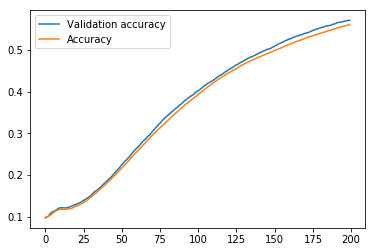

Creating network for 784-dimensional input and 10-dimensional output, with 1 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


 58%|█████▊    | 116/200 [00:24<00:17,  4.87it/s]

KeyboardInterrupt: 

In [10]:
plot_error('l1')

In [ ]:
plot_error('l2')

In [ ]:
plot_error('delta')